In [1]:
import pandas as pd
import numpy as np

from astropy.table import Table
import astropy

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib

In [2]:
%matplotlib notebook

In [3]:
print('numpy version: {}'.format(np.__version__))
print('pandas version: {}'.format(pd.__version__))
print('matplotlib version: {}'.format(matplotlib.__version__))
print('astropy version: {}'.format(astropy.__version__))

numpy version: 1.15.4
pandas version: 0.23.4
matplotlib version: 3.0.1
astropy version: 3.1.1


# Figure 3

Create Figure 3 (the relative rates of SN types in the ZTF BTS, ASAS-SN, and LOSS) in [Fremling et al. 2020](https://ui.adsabs.harvard.edu/abs/2019arXiv191012973F/abstract).

Data for ASAS-SN are from [Holoien et al. 2019](https://ui.adsabs.harvard.edu/abs/2019MNRAS.484.1899H/abstract), while data for LOSS are from [Li et al. 2011](https://ui.adsabs.harvard.edu/abs/2011MNRAS.412.1441L/abstract).

In [4]:
# BTS data
bts_df = pd.read_hdf('../data/final_rcf_table.h5')

In [5]:
normal_sne = np.where((bts_df.sn_type != 'SLSN-I') & 
                      (bts_df.sn_type != 'SLSN-II') &
                      (bts_df.sn_type != 'SLSN-R') & 
                      (bts_df.sn_type != 'ambiguous')
                     )

all_ia = np.where((bts_df.sn_type == 'Ia') |
                  (bts_df.sn_type == 'Ia-91T') |
                  (bts_df.sn_type == 'Ia-91bg') |
                  (bts_df.sn_type == 'Ia-02cx') | 
                  (bts_df.sn_type == 'Ia-csm') |
                  (bts_df.sn_type == 'Ia-SC')
                 )

all_ii = np.where((bts_df.sn_type == 'II') |
                  (bts_df.sn_type == 'IIn') |
                  (bts_df.sn_type == 'IIb') |
                  (bts_df.sn_type == 'II-87A')
                 )

all_se = np.where((bts_df.sn_type == 'Ic') |
                  (bts_df.sn_type == 'Ib') |
                  (bts_df.sn_type == 'Ic-BL') |
                  (bts_df.sn_type == 'Ib/c') |
                  (bts_df.sn_type == 'Ibn') |
                  (bts_df.sn_type == 'Ic-pec')
                 )

slsne = np.where((bts_df.sn_type == 'SLSN-I') | 
                 (bts_df.sn_type == 'SLSN-II') | 
                 (bts_df.sn_type == 'SLSN-R')
                )

In [6]:
n_sn = len(bts_df) -3
print('There are {} SNe in the BTS sample'.format(n_sn))
print('{} of these are not superluminous SNe in the BTS sample'.format(len(normal_sne[0])))
print('\t {} ({:.3f}%) are SNe Ia'.format(len(all_ia[0]), 100*len(all_ia[0])/n_sn))
print('\t {} ({:.3f}%) are SNe II'.format(len(all_ii[0]), 100*len(all_ii[0])/n_sn))
print('\t {} ({:.3f}%) are SNe Ib/c'.format(len(all_se[0]), 100*len(all_se[0])/n_sn))
print('\t {} ({:.3f}%) are SLSNe'.format(len(slsne[0]), 100*len(slsne[0])/n_sn))

There are 761 SNe in the BTS sample
742 of these are not superluminous SNe in the BTS sample
	 547 (71.879%) are SNe Ia
	 155 (20.368%) are SNe II
	 40 (5.256%) are SNe Ib/c
	 19 (2.497%) are SLSNe


#### Read in SN data from ASAS-SN

In [7]:
n_asas_ia = 0
n_asas_91T = 0
n_asas_91bg = 0
n_asas_ii = 0
n_asas_ibc = 0
n_asas_slsn = 0
asas_offset = np.array([])

for release in ['1','2','3','4']:
    tab1 = '../data/ASAS_SN/bright_sn_catalog_{}/table1.txt'.format(release)
    tab2 = '../data/ASAS_SN/bright_sn_catalog_{}/table2.txt'.format(release)

    asassn_tab1 = Table.read(tab1, format='cds')
    asassn_tab2 = Table.read(tab2, format='cds')

    n_asas_ia += len(np.where( (asassn_tab1['Type'] == 'Ia') | 
                        (asassn_tab1['Type'] == 'Ia-91T') | 
                        (asassn_tab1['Type'] == 'Ia-91bg') | 
                        (asassn_tab1['Type'] == 'Ia+CSM') |
                        (asassn_tab1['Type'] == 'Ia-pec') |
                        (asassn_tab1['Type'] == 'Ia-00cx') |
                        (asassn_tab1['Type'] == 'Ia-06bt') |
                        (asassn_tab1['Type'] == 'Ia-07if') |
                        (asassn_tab1['Type'] == 'Ia-09dc') |
                        (asassn_tab1['Type'] == 'Ia-02cx')
                       )[0])

    n_asas_91T += len(np.where( (asassn_tab1['Type'] == 'Ia-91T') )[0])
    n_asas_91bg += len(np.where( (asassn_tab1['Type'] == 'Ia-91bg') )[0])

    
    n_asas_ii += len(np.where( (asassn_tab1['Type'] == 'II') | 
                        (asassn_tab1['Type'] == 'IIP') | 
                        (asassn_tab1['Type'] == 'IIb') | 
                        (asassn_tab1['Type'] == 'II-pec') | 
                        (asassn_tab1['Type'] == 'IIn') |
                        (asassn_tab1['Type'] == 'IIn-pec') |
                        (asassn_tab1['Type'] == 'IIn/LBV') |
                        (asassn_tab1['Type'] == 'IIn-09ip') 
                       )[0])

    n_asas_ibc += len(np.where( (asassn_tab1['Type'] == 'Ib') | 
                         (asassn_tab1['Type'] == 'Ib/c') | 
                         (asassn_tab1['Type'] == 'Ibn') | 
                         (asassn_tab1['Type'] == 'Ic') |
                         (asassn_tab1['Type'] == 'Ic-pec') |
                         (asassn_tab1['Type'] == 'Ib/c-BL') |
                         (asassn_tab1['Type'] == 'Ic-BL')
                        )[0])

    n_asas_slsn += len(np.where( (asassn_tab1['Type'] == 'SLSN-II') | 
                          (asassn_tab1['Type'] == 'SLSN-I')
                         )[0])
    
    n_asas_ia += len(np.where( ( (asassn_tab2['Type'] == 'Ia') | 
                            (asassn_tab2['Type'] == 'Ia-91T') | 
                            (asassn_tab2['Type'] == 'Ia-91bg') | 
                            (asassn_tab2['Type'] == 'Ia+CSM') |
                            (asassn_tab2['Type'] == 'Ia-pec') |
                            (asassn_tab2['Type'] == 'Ia-00cx') |
                            (asassn_tab2['Type'] == 'Ia-06bt') |
                            (asassn_tab2['Type'] == 'Ia-07if') |
                            (asassn_tab2['Type'] == 'Ia-09dc') |
                            (asassn_tab2['Type'] == 'Ia-02cx')
                         ) & 
                         (asassn_tab2['Recovered'] == 'Yes')
                       )[0])

    n_asas_91T += len(np.where( (asassn_tab2['Type'] == 'Ia-91T')  & 
                         (asassn_tab2['Recovered'] == 'Yes')
                       )[0])
    n_asas_91bg += len(np.where( (asassn_tab2['Type'] == 'Ia-91bg')  & 
                         (asassn_tab2['Recovered'] == 'Yes')
                       )[0])

    n_asas_ii += len(np.where( ( (asassn_tab2['Type'] == 'II') | 
                            (asassn_tab2['Type'] == 'IIP') | 
                            (asassn_tab2['Type'] == 'IIb') | 
                            (asassn_tab2['Type'] == 'II-pec') | 
                            (asassn_tab2['Type'] == 'IIn') |
                            (asassn_tab2['Type'] == 'IIn-pec') |
                            (asassn_tab2['Type'] == 'IIn/LBV') |
                            (asassn_tab2['Type'] == 'IIn-09ip')
                         ) & 
                         (asassn_tab2['Recovered'] == 'Yes')
                       )[0])

    n_asas_ibc += len(np.where( ( (asassn_tab2['Type'] == 'Ib') | 
                             (asassn_tab2['Type'] == 'Ib/c') | 
                             (asassn_tab2['Type'] == 'Ibn') | 
                             (asassn_tab2['Type'] == 'Ic') |
                             (asassn_tab2['Type'] == 'Ic-pec') |
                             (asassn_tab2['Type'] == 'Ib/c-BL') |
                             (asassn_tab2['Type'] == 'Ic-BL')
                          ) &
                          (asassn_tab2['Recovered'] == 'Yes')
                        )[0])

    n_asas_slsn += len(np.where( ( (asassn_tab2['Type'] == 'SLSN-II') | 
                             (asassn_tab2['Type'] == 'SLSN-I')
                           ) & 
                           (asassn_tab2['Recovered'] == 'Yes')
                         )[0])

    asas_offset = np.append(asas_offset, np.array(asassn_tab1['Offset'][asassn_tab1['HostName'] != 'None'], dtype=float))
    asas_offset = np.append(asas_offset, 
                            np.array(asassn_tab2['Offset'][np.where((asassn_tab2['Recovered'] == 'Yes') & 
                                                                    (asassn_tab2['SNName'] != 'PS16dtm'))], dtype=float))
    
tot_asas = n_asas_ia + n_asas_ii + n_asas_ibc + n_asas_slsn

<IPython.core.display.Javascript object>


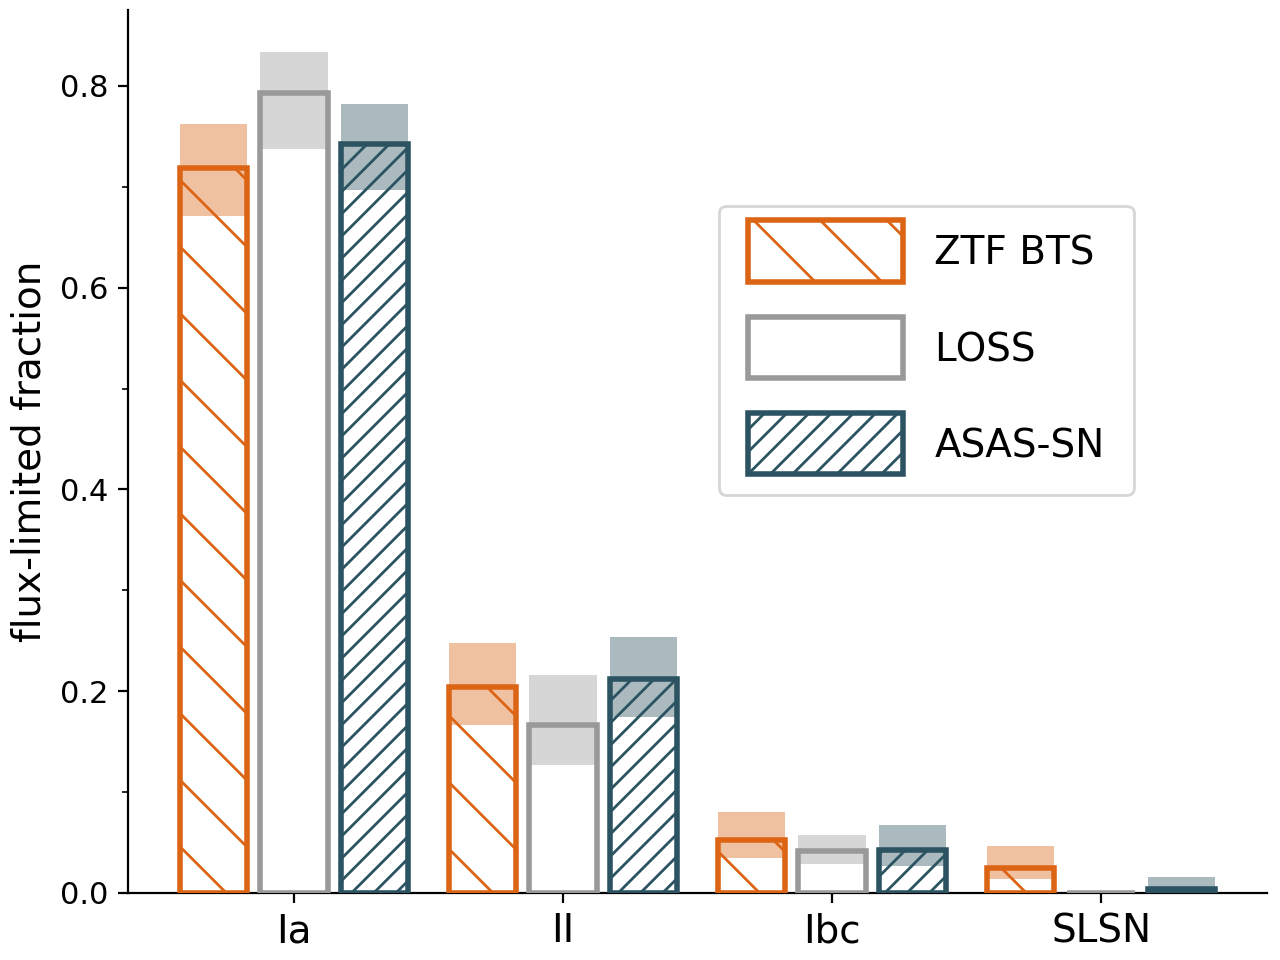

In [8]:
color_dict = {'blue': '#2C5361',
              'orange': '#DB6515', 
              'yellow': '#CF8E36', 
              'maroon': '#3B2525', 
              'purple': '#A588AC',
              'beige': '#D2A176'}


fig, ax = plt.subplots()
bar_width = 0.25
epsilon = 0.05

# CI are calculated MultinomCI - available here: https://rdrr.io/cran/DescTools/man/MultinomCI.html
bts_upper = [0.76194918, 0.24740644, 0.08006433, 0.04625050]
bts_lower = [0.67118508, 0.16597629, 0.03415659, 0.01334088]
asassn_upper = [0.78238445, 0.25404044, 0.06727064, 0.01589015]
asassn_lower = [0.6971419929, 0.1744027864, 0.0269571897, 0.0008384526]

# mean
ax.bar(np.arange(4) - bar_width - epsilon, 
       [len(all_ia[0])/n_sn, len(all_ii[0])/n_sn, 
        len(all_se[0])/n_sn, len(slsne[0])/n_sn],
       bar_width, lw=2, edgecolor=color_dict['orange'], facecolor='None', 
       hatch='\\', label='ZTF BTS', zorder=10)
# mean + unc
ax.bar(np.arange(4) - bar_width - epsilon, 
       bts_upper,
       bar_width, lw=2, color=color_dict['orange'], edgecolor='None',  alpha=0.4)
# mean - unc
ax.bar(np.arange(4) - bar_width - epsilon, 
       bts_lower,
       bar_width, lw=0, color='white', edgecolor='None', zorder=5)


# show Li 11 with uncertainties
ax.bar(np.arange(4), 
       [0.793, 0.166, 0.041, 0.0],
       bar_width, lw=2, edgecolor='0.6', facecolor='None', 
       label='LOSS', zorder=10)
ax.bar(np.arange(4), 
       [0.834, 0.216, 0.057, 0.0],
       bar_width, lw=2, color='0.6', edgecolor='None',  alpha=0.4)
ax.bar(np.arange(4), 
       [0.737, 0.127, 0.029, 0.0],
       bar_width, color='white', zorder=5, lw=0)

# mean
ax.bar(np.arange(4) + bar_width + epsilon, 
       [n_asas_ia/tot_asas, n_asas_ii/tot_asas, 
        n_asas_ibc/tot_asas, n_asas_slsn/tot_asas],
       bar_width, lw=2, edgecolor=color_dict['blue'], facecolor='None', 
       hatch='///', label='ASAS-SN', zorder=10)
# mean + unc
ax.bar(np.arange(4) + bar_width + epsilon, 
       asassn_upper,
       bar_width, lw=2, color=color_dict['blue'], edgecolor='None',  alpha=0.4)
# # mean - unc
ax.bar(np.arange(4) + bar_width + epsilon, 
       asassn_lower,
       bar_width, lw=0, color='white', edgecolor='None', zorder=5)


ax.tick_params(labelsize=11)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Ia', 'II', 'Ibc', 'SLSN'],fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.set_ylabel('flux-limited fraction',fontsize=14)

leg = ax.legend(fancybox=True, markerscale=20, 
                labelspacing=1.5, handlelength=4, 
                fontsize=14, loc=1, borderpad=0.75,
                bbox_to_anchor=(0.9,0.8))

for patch in leg.get_patches():
    patch.set_height(22)
    patch.set_y(-6)

fig.subplots_adjust(left=0.1,bottom=0.07,top=0.99,right=0.99)
fig.savefig('mag_limit_rates.pdf')